In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

In [2]:
df = pd.read_csv('cars_cleaned.csv')

In [4]:
df['Cena'].describe()

count    1.759450e+05
mean     7.191320e+04
std      9.346606e+04
min      9.400000e+02
25%      2.390000e+04
50%      4.550000e+04
75%      8.499900e+04
max      3.649000e+06
Name: Cena, dtype: float64

In [198]:
df.isna().sum()

Oferta_od_OsPrywatnej        0
Marka                        0
Rok_p                        0
Przebieg                     0
Poj_skcm3                  265
Paliwo                       0
Moc                          0
Automat_skrzynia             0
Napęd                        0
Nadwozie                     0
liczba_drzwi                 0
miejsca                      0
Kolor                        0
Bezwypadkowy             83173
Stan                         0
Cena                         0
ln_Cena                      0
ln_Moc                       0
ln_przebieg                  0
dtype: int64

In [197]:
# uzupełnienie pojemności skokowej średnią dla marki 
vehicleBrands = df['Marka'].unique()
for i in range(len(vehicleBrands)):
    

    brand = df['Marka']== vehicleBrands[i]
    
    brandMean = df.loc[brand]['Poj_skcm3'].mean()

    rows = df.loc[brand]
    rows.loc[rows['Poj_skcm3'].isnull(),'Poj_skcm3'] = brandMean
    
    df.loc[brand,'Poj_skcm3'] = rows


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [199]:
#uzupełnienie pozostałych przypadków średnią dla całej grupy
df['Poj_skcm3']=df['Poj_skcm3'].fillna(df['Poj_skcm3'].mean())


In [200]:
df1=df.drop(['Bezwypadkowy'], axis=1)

In [201]:
df1

,Oferta_od_OsPrywatnej,Marka,Rok_p,Przebieg,Poj_skcm3,Paliwo,Moc,Automat_skrzynia,Napęd,Nadwozie,liczba_drzwi,miejsca,Kolor,Stan,Cena,ln_Cena,ln_Moc,ln_przebieg
0,1,Acura,2006,211500.0,3210.0,Benzyna,258,1,Na przednie koła,Sedan,4.0,5.0,Szary,Używane,47995,10.778852,5.552960,12.261980
1,1,Acura,2019,108396.0,1996.0,Benzyna,284,1,4x4 (dołączany automatycznie),SUV,5.0,5.0,Czarny,Używane,178000,12.089539,5.648974,11.593546
2,1,Acura,2015,32000.0,3471.0,Benzyna,310,1,Na przednie koła,Sedan,4.0,5.0,Czarny,Używane,149000,11.911702,5.736572,10.373491
3,0,Acura,2022,2342.0,3664.0,Benzyna+LPG,300,1,4x4 (stały),SUV,5.0,5.0,Biały,Używane,23444,10.062370,5.703782,7.758761
4,0,Acura,2022,23444.0,3454.0,Benzyna,355,0,4x4 (stały),Auta małe,3.0,5.0,Beżowy,Używane,51000,10.839581,5.872118,10.062370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175940,1,Cupra,2020,12774.0,1498.0,Benzyna,150,1,4x4 (dołączany automatycznie),SUV,5.0,5.0,Czarny,Używane,121000,11.703546,5.010635,9.455167
175941,0,Cupra,2021,26200.0,1498.0,Benzyna,150,1,Na przednie koła,SUV,5.0,5.0,Czarny,Używane,138900,11.841510,5.010635,10.173515
175942,1,Cupra,2022,17400.0,1498.0,Benzyna,150,1,Na przednie koła,SUV,5.0,5.0,Szary,Używane,133000,11.798104,5.010635,9.764225
175943,1,Cupra,2021,28000.0,1498.0,Benzyna,150,1,4x4 (dołączany automatycznie),Kombi,5.0,5.0,Szary,Używane,135000,11.813030,5.010635,10.239960


In [96]:
pop_mark = df1['Marka'].value_counts()[:20].sort_values(ascending=True)

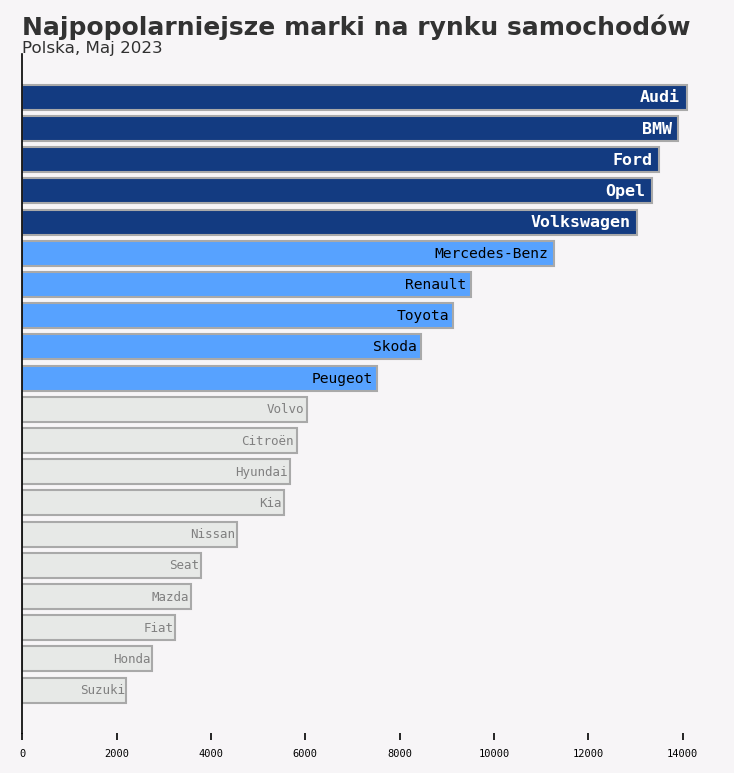

In [231]:
fig = plt.figure(figsize=(6,6),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#f7f5f7" 
high_c = '#133b81'
mid_c = '#57a2ff'
plt.rcParams["font.family"] = "monospace"

fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

data = pop_mark

color_map = ['#e7e9e7' for _ in range(20)] 
color_map[15] = color_map[16] = color_map[17] = color_map[18] = color_map[19] = high_c # color highlight 
color_map[10] = color_map[11] = color_map[12] = color_map[13] = color_map[14] = mid_c # color highlight 

ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)

for i in range(0,10):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i),  
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=6, color='gray')
    
for i in range(10,15):
    ax0.annotate(list(data.index)[i],  
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=7, color='black')

for i in range(15,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='bold', fontfamily='monospace',fontsize=8, color='white')

plt.xticks(fontsize = 5)
ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,21,'Najpopolarniejsze marki na rynku samochodów', fontfamily='sans-serif',fontsize=12,fontweight='bold',color='#323232')
ax0.text(0,20.45,'Polska, Maj 2023',fontfamily='sans-serif',fontsize=8,fontweight='light',color='#303030')
plt.savefig('pop_marki.png')
plt.show()

In [202]:
df['Paliwo'].value_counts()

Benzyna        83068
Diesel         78845
Benzyna+LPG     6851
Hybryda         5305
Elektryczny     1810
Benzyna+CNG       65
Wodór              1
Name: Paliwo, dtype: int64

In [203]:
df3 = df[df['Paliwo'] != 'Wodór']

In [204]:
df3 = df[df['Paliwo'] != 'Benzyna+CNG']

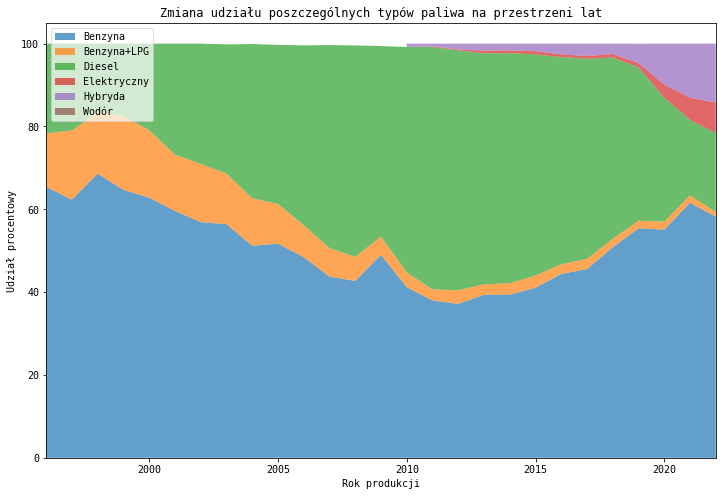

In [232]:
# Grupowanie danych po roku produkcji i typie paliwa oraz obliczenie sumy dla każdego roku
grupowane = df3.groupby(['Rok_p', 'Paliwo']).size().unstack()

# Obliczanie udziału procentowego dla każdego typu paliwa w danym roku
udzial_procentowy = grupowane.div(grupowane.sum(axis=1), axis=0) * 100

# Wybór kolorów dla stackplota
kolory = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
liczba_kolorow = len(kolory)

# Tworzenie stackplota dla każdego typu paliwa z nowymi kolorami
plt.stackplot(udzial_procentowy.index, udzial_procentowy.values.T, labels=udzial_procentowy.columns, colors=kolory[:liczba_kolorow], alpha=0.7)

plt.xlabel('Rok produkcji')
plt.ylabel('Udział procentowy')
plt.title('Zmiana udziału poszczególnych typów paliwa na przestrzeni lat')
plt.xlim(1996,2022)

# Ustawienie przezroczystej legendy
plt.legend(loc='upper left', facecolor='white', framealpha=0.7)

# Zwiększenie rozmiaru wykresu
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig('paliwo_udzial.png')
plt.show()


FixedFormatter should only be used together with FixedLocator


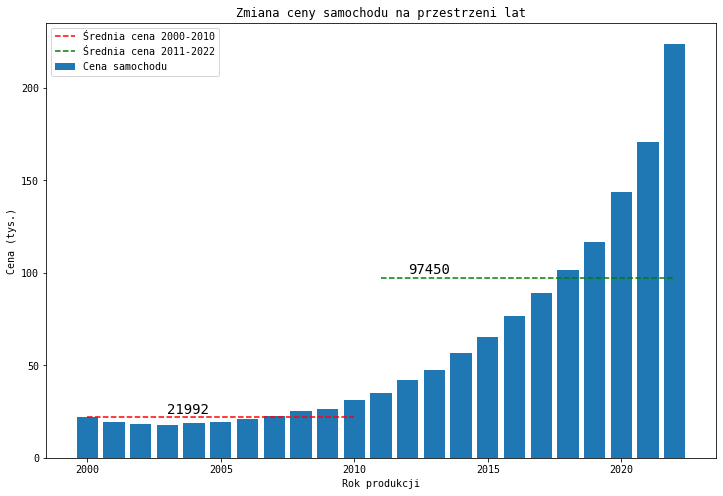

In [233]:
import matplotlib.pyplot as plt

# Filtrowanie danych dla lat 2000-2022
df_filtered = df[(df['Rok_p'] >= 2000) & (df['Rok_p'] <= 2022)]

# Grupowanie danych po roku produkcji i obliczanie średniej ceny dla każdego roku
grupowane = df_filtered.groupby('Rok_p')['Cena'].mean()

# Podział danych na dwa okresy: 2000-2010 i 2011-2022
okres_1 = grupowane[(grupowane.index >= 2000) & (grupowane.index <= 2010)]
okres_2 = grupowane[(grupowane.index >= 2011) & (grupowane.index <= 2022)]

# Tworzenie wykresu kolumnowego dla cen samochodu na przestrzeni lat
plt.bar(grupowane.index, grupowane.values, label='Cena samochodu')

# Dodanie średnich cen dla dwóch okresów
plt.hlines(okres_1.mean(), 2000, 2010, colors='red', linestyles='dashed', label='Średnia cena 2000-2010')
plt.hlines(okres_2.mean(), 2011, 2022, colors='green', linestyles='dashed', label='Średnia cena 2011-2022')

plt.xlabel('Rok produkcji')
plt.ylabel('Cena (tys.)')  # Zmiana opisu osi Y
plt.title('Zmiana ceny samochodu na przestrzeni lat')
plt.legend()

# Formatowanie osi Y
plt.gca().set_yticklabels(['{:.0f}'.format(x/1000) for x in plt.gca().get_yticks()])

# Dodanie wartości średnich nad odpowiednimi przedziałami
plt.text(2003, okres_1.mean() + 2000, '{:.0f}'.format(okres_1.mean()), ha='left', fontsize=14)
plt.text(2012, okres_2.mean() + 2000, '{:.0f}'.format(okres_2.mean()), ha='left', fontsize=14)

plt.savefig('sr_cena.png')
plt.show()


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


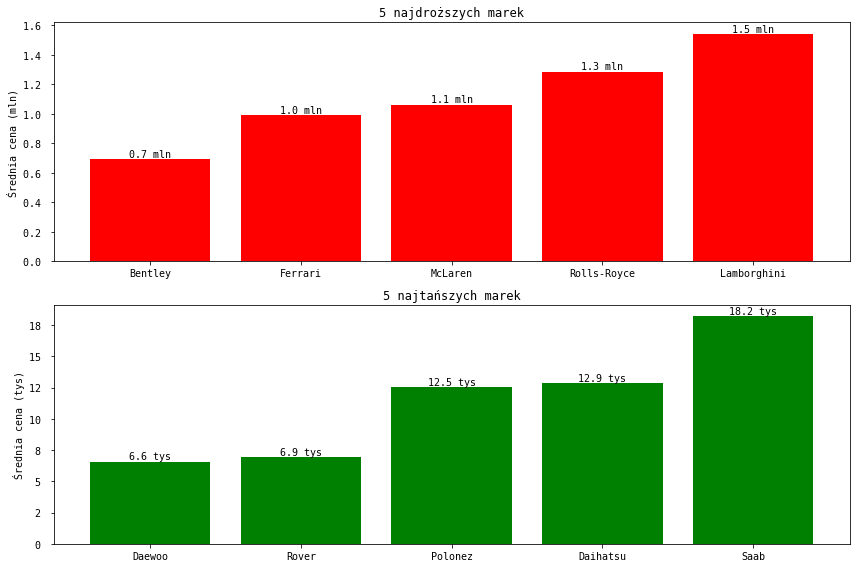

In [234]:
# Obliczanie średnich cen samochodów dla każdej marki
srednie_ceny = df.groupby('Marka')['Cena'].mean()

# Sortowanie marek po średnich cenach
srednie_ceny = srednie_ceny.sort_values()

# Wybieranie 5 najdroższych i 5 najtańszych marek
najdrozsze = srednie_ceny.tail(5)
najtansze = srednie_ceny.head(5)

# Tworzenie wykresu kolumnowego dla najdroższych marek
plt.subplot(2, 1, 1)
plt.bar(najdrozsze.index, najdrozsze.values, color='red')
plt.ylabel('Średnia cena (mln)')
plt.title('5 najdroższych marek')

# Formatowanie osi Y dla najdroższych marek
plt.gca().set_yticklabels(['{:.1f} '.format(x/1000000) for x in plt.gca().get_yticks()])

# Dodawanie etykiet danych dla najdroższych marek
for i in range(len(najdrozsze)):
    plt.text(i, najdrozsze.values[i], '{:.1f} mln'.format(najdrozsze.values[i]/1000000), ha='center', va='bottom')

# Tworzenie wykresu kolumnowego dla najtańszych marek
plt.subplot(2, 1, 2)
plt.bar(najtansze.index, najtansze.values, color='green')
plt.ylabel('Średnia cena (tys)')
plt.title('5 najtańszych marek')

# Formatowanie osi Y dla najtańszych marek
plt.gca().set_yticklabels(['{:.0f} '.format(x/1000) for x in plt.gca().get_yticks()])

# Dodawanie etykiet danych dla najtańszych marek
for i in range(len(najtansze)):
    plt.text(i, najtansze.values[i], '{:.1f} tys'.format(najtansze.values[i]/1000), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('5high_5low.png')
plt.show()


In [70]:
#!pip install shap

In [98]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import shap

In [117]:
df1

,Oferta_od_OsPrywatnej,Marka,Rok_p,Przebieg,Poj_skcm3,Paliwo,Moc,Automat_skrzynia,Napęd,Nadwozie,liczba_drzwi,miejsca,Kolor,Stan,Cena,ln_Cena,ln_Moc,ln_przebieg
0,1,Acura,2006,211500.0,3210.0,Benzyna,258,1,Na przednie koła,Sedan,4.0,5.0,Szary,Używane,47995,10.778852,5.552960,12.261980
1,1,Acura,2019,108396.0,1996.0,Benzyna,284,1,4x4 (dołączany automatycznie),SUV,5.0,5.0,Czarny,Używane,178000,12.089539,5.648974,11.593546
2,1,Acura,2015,32000.0,3471.0,Benzyna,310,1,Na przednie koła,Sedan,4.0,5.0,Czarny,Używane,149000,11.911702,5.736572,10.373491
3,0,Acura,2022,2342.0,3664.0,Benzyna+LPG,300,1,4x4 (stały),SUV,5.0,5.0,Biały,Używane,23444,10.062370,5.703782,7.758761
4,0,Acura,2022,23444.0,3454.0,Benzyna,355,0,4x4 (stały),Auta małe,3.0,5.0,Beżowy,Używane,51000,10.839581,5.872118,10.062370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175940,1,Cupra,2020,12774.0,1498.0,Benzyna,150,1,4x4 (dołączany automatycznie),SUV,5.0,5.0,Czarny,Używane,121000,11.703546,5.010635,9.455167
175941,0,Cupra,2021,26200.0,1498.0,Benzyna,150,1,Na przednie koła,SUV,5.0,5.0,Czarny,Używane,138900,11.841510,5.010635,10.173515
175942,1,Cupra,2022,17400.0,1498.0,Benzyna,150,1,Na przednie koła,SUV,5.0,5.0,Szary,Używane,133000,11.798104,5.010635,9.764225
175943,1,Cupra,2021,28000.0,1498.0,Benzyna,150,1,4x4 (dołączany automatycznie),Kombi,5.0,5.0,Szary,Używane,135000,11.813030,5.010635,10.239960


In [259]:
df_mod = df1.drop(['Marka', 'Moc', 'ln_przebieg', 'Kolor'], axis =1)

In [260]:
df_mod = pd.get_dummies(df_mod)

In [261]:
df_mod

,Oferta_od_OsPrywatnej,Rok_p,Przebieg,Poj_skcm3,Automat_skrzynia,liczba_drzwi,miejsca,Cena,ln_Cena,ln_Moc,...,Nadwozie_Auta miejskie,Nadwozie_Coupe,Nadwozie_Kabriolet,Nadwozie_Kombi,Nadwozie_Kompakt,Nadwozie_Minivan,Nadwozie_SUV,Nadwozie_Sedan,Stan_Nowe,Stan_Używane
0,1,2006,211500.0,3210.0,1,4.0,5.0,47995,10.778852,5.552960,...,0,0,0,0,0,0,0,1,0,1
1,1,2019,108396.0,1996.0,1,5.0,5.0,178000,12.089539,5.648974,...,0,0,0,0,0,0,1,0,0,1
2,1,2015,32000.0,3471.0,1,4.0,5.0,149000,11.911702,5.736572,...,0,0,0,0,0,0,0,1,0,1
3,0,2022,2342.0,3664.0,1,5.0,5.0,23444,10.062370,5.703782,...,0,0,0,0,0,0,1,0,0,1
4,0,2022,23444.0,3454.0,0,3.0,5.0,51000,10.839581,5.872118,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175940,1,2020,12774.0,1498.0,1,5.0,5.0,121000,11.703546,5.010635,...,0,0,0,0,0,0,1,0,0,1
175941,0,2021,26200.0,1498.0,1,5.0,5.0,138900,11.841510,5.010635,...,0,0,0,0,0,0,1,0,0,1
175942,1,2022,17400.0,1498.0,1,5.0,5.0,133000,11.798104,5.010635,...,0,0,0,0,0,0,1,0,0,1
175943,1,2021,28000.0,1498.0,1,5.0,5.0,135000,11.813030,5.010635,...,0,0,0,1,0,0,0,0,0,1


In [262]:
df_mod.isnull().sum()

Oferta_od_OsPrywatnej                  0
Rok_p                                  0
Przebieg                               0
Poj_skcm3                              0
Automat_skrzynia                       0
liczba_drzwi                           0
miejsca                                0
Cena                                   0
ln_Cena                                0
ln_Moc                                 0
Paliwo_Benzyna                         0
Paliwo_Benzyna+CNG                     0
Paliwo_Benzyna+LPG                     0
Paliwo_Diesel                          0
Paliwo_Elektryczny                     0
Paliwo_Hybryda                         0
Paliwo_Wodór                           0
Napęd_4x4 (dołączany automatycznie)    0
Napęd_4x4 (dołączany ręcznie)          0
Napęd_4x4 (stały)                      0
Napęd_Na przednie koła                 0
Napęd_Na tylne koła                    0
Nadwozie_Auta małe                     0
Nadwozie_Auta miejskie                 0
Nadwozie_Coupe  

In [263]:
x=df_mod.drop(['Cena', 'ln_Cena'], axis=1)
y=df_mod['ln_Cena']

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)


In [265]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

In [266]:
params={'metric': 'rmse'}


In [267]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=1000,
                early_stopping_rounds=100,
                verbose_eval=100)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 140756, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.733294
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.292105
[200]	valid_0's rmse: 0.282987
[300]	valid_0's rmse: 0.278836
[400]	valid_0's rmse: 0.276073
[500]	valid_0's rmse: 0.273986
[600]	valid_0's rmse: 0.272471
[700]	valid_0's rmse: 0.271531
[800]	valid_0's rmse: 0.270549
[900]	valid_0's rmse: 0.269953
[1000]	valid_0's rmse: 0.269263
Did not meet early stopping. Best iteration is:
[999]	val

In [268]:
predicted = gbm.predict(x_test)


In [273]:
def pred_map(pred_df):
    rmse = np.sqrt(mean_squared_error(pred_df['data'], pred_df['pred']))
    R2 = r2_score(pred_df['data'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('data', 'pred', data=pred_df)
    ax.set_xlabel('Wartości rzeczywiste', fontsize=10)
    ax.set_ylabel('Wartości oszacowane', fontsize=10)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'rmse = {}'.format(str(round(rmse, 5))), transform=ax.transAxes, fontsize=10)
    plt.text(0.1, 0.8, 'R2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=10)
    plt.savefig('pred_map.png')

In [270]:
df_prediction = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
df_prediction.columns = ['data', 'pred']

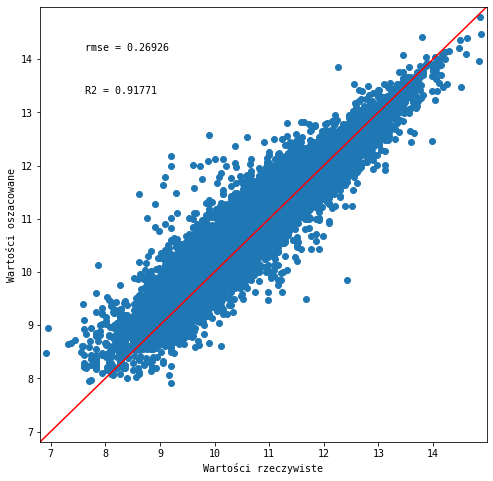

In [274]:
pred_map(df_prediction)

In [272]:
# pobranie wartości shap, uwaga kod długo się kompiluje
explainer = shap.Explainer(gbm, x_train)
shap_values = explainer(x_test)

100%|===================| 35165/35189 [12:58<00:00]        

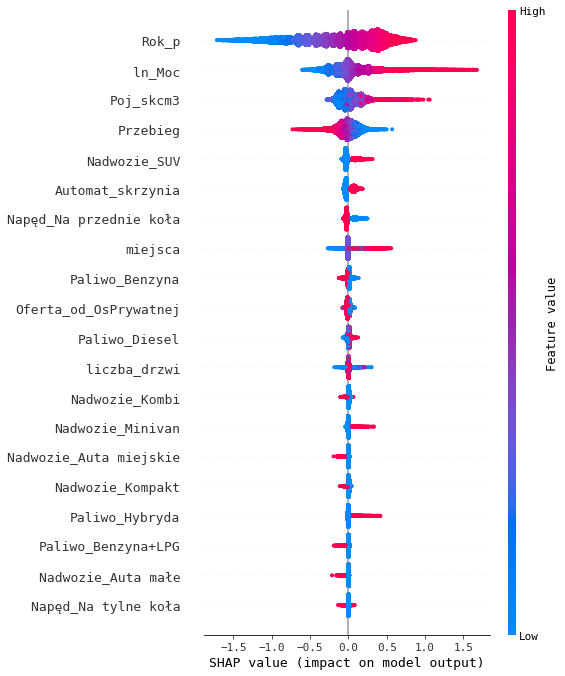

In [275]:
# wykres wartości shap
shap.summary_plot(shap_values, x_test)


In [276]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual, color = 'black')
    plt.plot(range(rows), predictions, color = 'orange')
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.ylabel('log car prices')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.savefig('act_vs_pred.png')
    plt.show()

In [277]:
# wykonanie predykcji
train_predict = gbm.predict(x_train)
test_predict = gbm.predict(x_test)

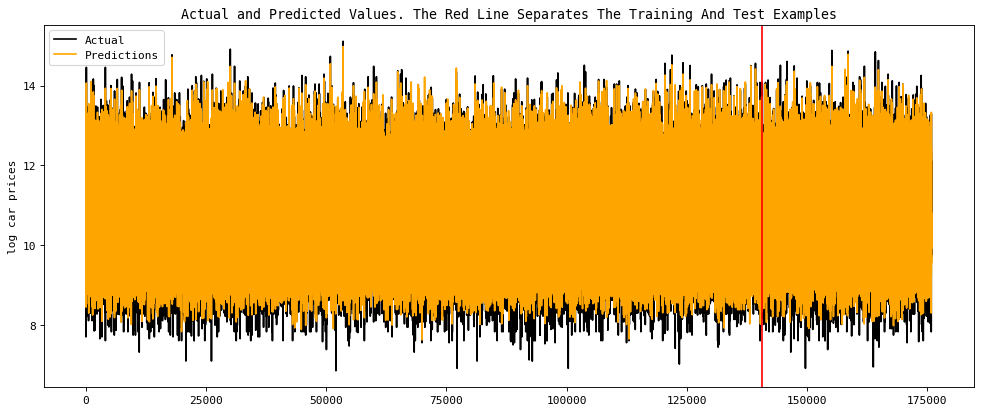

In [278]:
plot_result(y_train, y_test, train_predict, test_predict)